## Analyzing tweets with VADER Sentiment

Majority of the tweets from these news organizations appear to be neutral. Also, tweets and tweet polarity don’t seem to be related. The VADER sentiment score from one tweet to the next can vary. 

Overall, CBS appears to be the most positive organization with an average VADER sentiment score of 0.25, while The New York Times appears to be the most negative with an average VADER sentiment score of -0.04. 

CNN appears to be the most neutral organization with an average VADER sentiment of 0.013

Emojis are seen more frequently in tweets of BBC and CBS, which added weights to their neutral scores. 


In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
import time
import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Media Channels
target_user = ('@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes')

# List for dictionaries of results
# Variables for holding sentiments
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
tweet_date = []
tweet_text = []

# Loop through each user
for target in target_user:

        public_tweets = api.user_timeline(target, count=100, result_type = 'recent')
        
        tweet_ago = 0

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Print Tweets
            print(f'Tweet {tweet_ago}: {tweet["text"]}')

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet['text'])
            compound = results['compound']
            pos = results['pos']
            neu = results['neu']
            neg = results['neg']
            
            tweet_ago += 1
                      
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)
            results_list.append(target)
            tweet_number.append(tweet_ago)
            tweet_date.append(tweet['created_at'])
            tweet_text.append(tweet['text'])
                
            sentiments = {'User': results_list,
                          'Date': tweet_date,
                          'Tweet Text' : tweet_text,
                          'Compound': compound_list,
                          'Positive': positive_list,
                          'Neutral': neutral_list,
                          'Negative': negative_list,
                         'Tweets Ago': tweet_number}
            
print(sentiments) 

Tweet 0: Stacey Dooley meets a Roma girl who turned to prostitution after she was removed from her parents at 13. https://t.co/I7opQRZ6Z2
Tweet 1: 🇺🇸 @edballs travels to America's Deep South to immerse himself in the lives of those who put Trump in power, and le… https://t.co/2oLWounf1y
Tweet 2: RT @BBCSport: Geraint Thomas has done it! 👏🏴󠁧󠁢󠁷󠁬󠁳󠁿

He's become the first ever Welshman to win the Tour de France 👉 https://t.co/ZtkRdPtGio…
Tweet 3: 😂 A Scottish three year old's take on the summer holidays. https://t.co/SaCbnnlnUm
Tweet 4: 😀♥️ Four-year-old Daniel and 91-year-old Stuart, who has dementia, have struck up an unlikely friendship. https://t.co/DVpVhIssTc
Tweet 5: 😂📺🇦🇱 Here’s what happened when @RomeshRanga went on Albanian TV. https://t.co/WQ8kMjSFco
Tweet 6: Follow live coverage as 150 of the world's best cyclists compete on 200km of closed roads in London and Surrey. 🚴🚴🚴… https://t.co/it0KrVzqqu
Tweet 7: RT @BBCSportWales: It's a matter of hours until Geraint Thomas is crowned 

Tweet 0: Housewives. PTA moms. School volunteers. Starting TONIGHT, hear the stories of seemingly innocent women who put it… https://t.co/5TA15OiTuh
Tweet 1: This is one allowance that can’t be beat! Kids are winning big this week on @PriceIsRight. 🎉
 https://t.co/lncKu9XvNo
Tweet 2: Renowned artists Cher, Philip Glass, Reba McEntire, Wayne Shorter, and the co-creators of #Hamilton will be recogni… https://t.co/PEjjI9MKE1
Tweet 3: Who's excited for the return of @MurphyBrownCBS? Here's a behind-the-scenes look at the first table read of the sea… https://t.co/1B5S4WJnCW
Tweet 4: Mark your calendars because you won’t want to miss this! Former Secretaries of State @HillaryClinton, @Madeleine, a… https://t.co/JKDPp97OqN
Tweet 5: The cast couldn’t be more excited to welcome @ansonmount into the @startrekcbs family! Who’s ready to see the iconi… https://t.co/fOS4f4VCb2
Tweet 6: RT @startrekcbs: Stream the full panel &amp; learn all the exclusive details revealed about season 2 of #StarTrekDi

Tweet 0: Palestinian teen activist Ahed Tamimi has been released from an Israeli prison after serving an 8-month prison sent… https://t.co/c2XsaRZGQ0
Tweet 1: There are 100 days to the midterm election. Here's what to watch: https://t.co/64dpmcDvQ7 https://t.co/loNDIF3yfI
Tweet 2: 2018 is on pace to be the fourth hottest year on record, according to data from the National Oceanic and Atmospheri… https://t.co/DGbncI4Pk9
Tweet 3: President Trump threatens to push the government into shutdown ahead of the coming appropriations deadline if Congr… https://t.co/i63KxWcUMA
Tweet 4: Who is Andrew Brunson, the detained American pastor central to the US-Turkey dispute https://t.co/jtUi6jrUfT https://t.co/RJ2Vfwy0Lf
Tweet 5: Nikolai Volkoff, the wrestler whose brash Soviet persona made him one of the most hated figures in professional wre… https://t.co/REWVlWdQwe
Tweet 6: A prominent neurologist collapses, sending her friends and colleagues on a frantic fight to save her life. A new ep… https://t

Tweet 0: Rudy Giuliani is questioning the authenticity of Michael Cohen's secret recording with President Trump;… https://t.co/J4q4xlAzYh
Tweet 1: Trump fires back at 'insane' media after NY Times publisher calls rhetoric 'divisive' and 'dangerous' https://t.co/2QIZlYzhyN
Tweet 2: .@carolmswain: "As a professor, I believed in truth in advertising. So when students were making decisions about co… https://t.co/LEp7R0yZ0z
Tweet 3: OPINION: Trump should tone down his Twitter threats, or America could face trouble around the world https://t.co/qyaK4C2SqM
Tweet 4: Philadelphia terminates ICE contract after activists storm city hall; DHS rips 'misguided' move https://t.co/1FTxPwOysX
Tweet 5: On "Sunday Morning Futures," @VP Mike Pence talked about his plans to travel to Hawaii next week to receive the rem… https://t.co/APubvxTPax
Tweet 6: TONIGHT: Go inside the home of @Jeopardy TV Legend Alex Trebek with @HarveyLevinTMZ - 8p ET on Fox News Channel! https://t.co/RQ85gShnbM
Tweet 7: .@GiannoCa

Tweet 0: Here are the week’s top stories, and a look ahead https://t.co/SNuieLVfpi
Tweet 1: @MikeIsaac  https://t.co/7vUC6VzNos
Tweet 2: Want to feel old? Tom Cruise has played Ethan Hunt in the “Mission: Impossible” movie series for 22 years. https://t.co/D5YmYPRwS6
Tweet 3: RT @MarkLandler: Times publisher A.G. Sulzberger told Trump in Oval Office meeting that newspapers were hiring  armed guards because of thr…
Tweet 4: In Opinion 

Editorial board member Brent Staples writes, "This betrayal of trust opened a rift between black and w… https://t.co/hfeT7NGIgR
Tweet 5: Amid widespread protests over a power crisis, Iraq’s prime minister has ordered the suspension of the country’s ele… https://t.co/ESI7Bx9EAl
Tweet 6: Zimbabweans prepare to vote in the first elections in their country since Robert Mugabe was ousted after 37 years i… https://t.co/VQqvqvXBE4
Tweet 7: Harvard says it does not discriminate. But its policies are being challenged by Asian-Americans who say they’ve bee… https:

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,User,Date,Tweet Text,Compound,Positive,Neutral,Negative,Tweets Ago
0,@BBC,Sun Jul 29 20:03:05 +0000 2018,Stacey Dooley meets a Roma girl who turned to ...,0.0000,0.000,1.000,0.000,1
1,@BBC,Sun Jul 29 19:02:05 +0000 2018,🇺🇸 @edballs travels to America's Deep South to...,0.4215,0.109,0.891,0.000,2
2,@BBC,Sun Jul 29 17:29:30 +0000 2018,RT @BBCSport: Geraint Thomas has done it! 👏🏴󠁧󠁢...,0.6239,0.146,0.854,0.000,3
3,@BBC,Sun Jul 29 17:03:03 +0000 2018,😂 A Scottish three year old's take on the summ...,0.6705,0.315,0.591,0.094,4
4,@BBC,Sun Jul 29 16:06:01 +0000 2018,😀♥️ Four-year-old Daniel and 91-year-old Stuar...,0.2263,0.153,0.741,0.106,5
5,@BBC,Sun Jul 29 15:03:02 +0000 2018,😂📺🇦🇱 Here’s what happened when @RomeshRanga we...,0.0000,0.000,1.000,0.000,6
6,@BBC,Sun Jul 29 14:01:05 +0000 2018,Follow live coverage as 150 of the world's bes...,0.6369,0.167,0.833,0.000,7
7,@BBC,Sun Jul 29 13:20:07 +0000 2018,RT @BBCSportWales: It's a matter of hours unti...,0.5994,0.159,0.841,0.000,8
8,@BBC,Sun Jul 29 13:18:07 +0000 2018,RT @bbcgetinspired: Sam Maycock is fulfilling ...,-0.3818,0.078,0.781,0.141,9
9,@BBC,Sun Jul 29 13:01:07 +0000 2018,This teenager was banned from performing in dr...,-0.2732,0.142,0.609,0.249,10


In [4]:
# Export DataFrame to csv (encoding='utf-8-sig' to keep the emojis)
sentiments_pd.to_csv('Compound Results.csv', encoding = 'utf-8-sig')

In [5]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
# Referenced "pandas.DataFrame.pivot" to re-organize DataFrame
user_sentiments = sentiments_pd.pivot(index = 'Tweets Ago', columns = 'User', values = 'Compound')
user_sentiments

User,@BBC,@CBS,@CNN,@FoxNews,@nytimes
Tweets Ago,,,,,
1,0.0000,0.3400,-0.7650,-0.1027,0.2023
2,0.4215,0.7500,0.0000,0.0000,0.0000
3,0.6239,0.0000,0.0000,0.3182,0.4019
4,0.6705,0.3400,-0.3818,-0.6705,0.0000
5,0.2263,-0.1511,-0.6597,0.0000,-0.2960
6,0.0000,0.8293,-0.6697,0.0000,-0.7184
7,0.6369,0.1280,0.2263,0.0000,0.0000
8,0.5994,-0.2960,-0.3400,-0.5859,-0.1531
9,-0.3818,-0.2960,0.0000,0.0000,0.2732


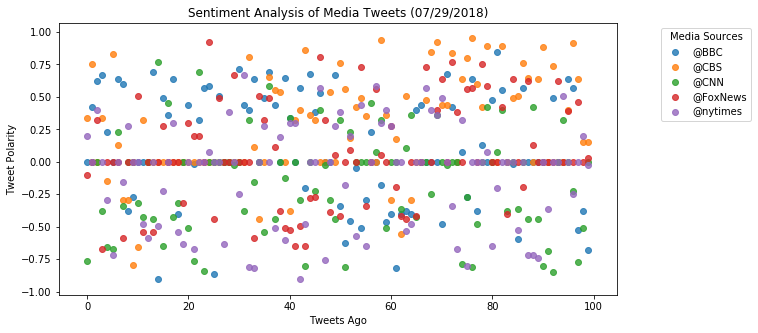

In [6]:
# Scatter plot of Sentiments
x_values = np.arange(100)

fig = plt.figure(figsize=(10, 5))

for user in target_user:
    
    plt.scatter(x_values, user_sentiments[user], marker="o", alpha=0.8)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title = 'Media Sources')

# Add title and labels
plt.title(f'Sentiment Analysis of Media Tweets (%s)' % (time.strftime("%m/%d/%Y")))
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')

plt.savefig('VADER Sentiment Analysis.png')
plt.show()

In [8]:
# Overall Sentiments per Organization
User_Group = sentiments_pd.groupby('User')

# Average Compound Scores per Organization
User_Group_Compound = User_Group['Compound'].mean()
User_Group_Compound

User
@BBC        0.108759
@CBS        0.248360
@CNN       -0.138308
@FoxNews    0.061280
@nytimes   -0.092582
Name: Compound, dtype: float64

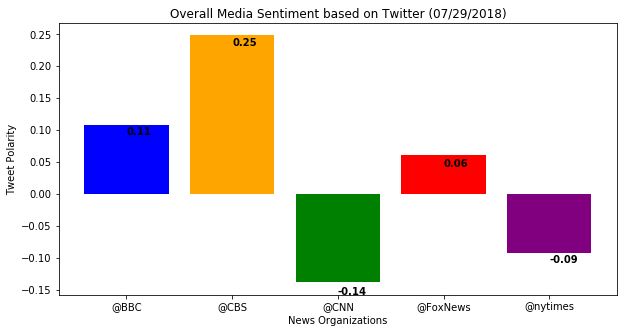

In [33]:
# Bar Plot of overall Sentiments
tweet_ago = np.arange(0,len(User_Group_Compound))
UGC = User_Group_Compound.round(2)

plt.figure(figsize=(10,5))

# Add title and labels
plt.title('Overall Media Sentiment based on Twitter (%s)' % (time.strftime("%m/%d/%Y")))
plt.xlabel('News Organizations')
plt.ylabel('Tweet Polarity')
labels = target_user
plt.xticks(tweet_ago, labels)
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.bar(tweet_ago, User_Group_Compound, color = colors)
for i, v in enumerate(UGC):
    plt.text(i, v-.018, str(v).format(), color='black', fontweight='bold')

plt.savefig('Overall Media Sentiment based on Twitter.png')
plt.show()